# Shift and Stack 100 mock spectra 

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
import chopstacks as cs

In [2]:
%matplotlib inline

In [3]:
# test function
def samplesp(v,vc,sigma=1.0,depth=1.0):
    sp=np.exp(-depth*np.exp(-(v-vc)*(v-vc)/(2.0*sigma*sigma)))
    return sp

In [4]:
# generate test function
Nsp=100 # number of the spectra
vclist=np.random.normal(0,10,Nsp)+50 # displacement

v=np.arange(0,100,0.1)
Nv=len(v)
sp=np.zeros((Nv,Nsp))
for i in range(0,Nsp):
    sp[:,i]=samplesp(v,vclist[i]) + np.random.normal(0,0.1,Nv)

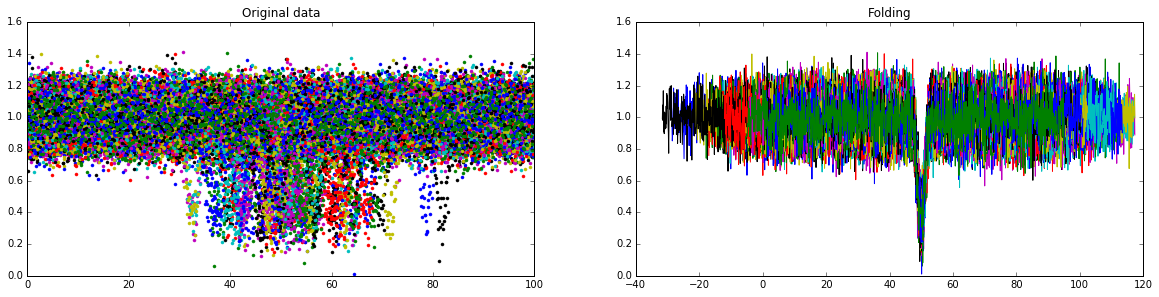

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
for i in range(0,Nsp):
    ax.plot(v,sp[:,i],".")
plt.title("Original data")
ax = fig.add_subplot(222)
for i in range(0,Nsp):
    ax.plot(v-vclist[i]+50,sp[:,i])
plt.title("Folding")
plt.show()

In [6]:
#Chop and Stacks
vhigh=np.arange(0,100,0.01) #high resolution binning
hvw=cs.buildwall(vhigh)
hf=np.zeros(len(hvw)-1)
for i in range(0,Nsp):
    vw=cs.buildwall(v-vclist[i]+50)
    hf=cs.cutput(vw,sp[:,i],hvw,hf)

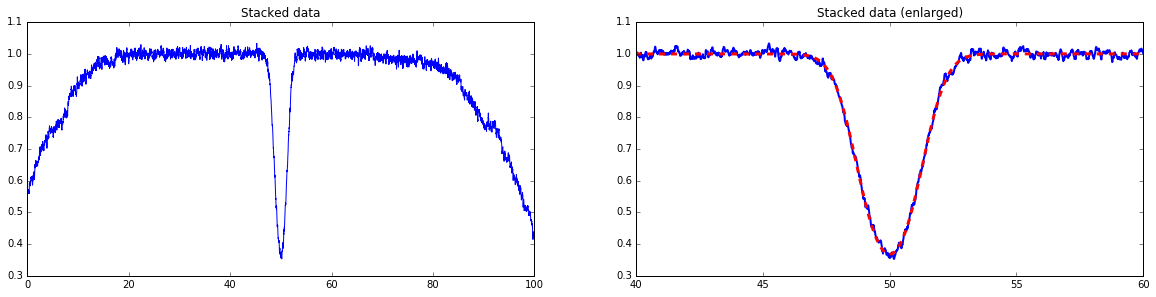

In [7]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
ax.plot(vhigh,hf/Nsp)
plt.title("Stacked data")
ax = fig.add_subplot(222)
ax.plot(vhigh,hf/Nsp,lw=2)
ax.plot(v,samplesp(v,50),color="red",ls="dashed",lw=3)
plt.xlim(40,60)
plt.title("Stacked data (enlarged)")
plt.show()